# 第一章 统计学习方法概论

### 使用最小二乘法拟合曲线

对于数据(Xi,yi),拟合出函数h(x)

有误差（残差） ri = h(xi)-yi

当L2范数（残差平方和）最小时，h(x)和y的相似度最高

一般H（x）为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

w(w0,w1,w2...wn) 为参数

最小二乘法就是找到一组参数w(w0,w1,w2...wn) 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求$min\sum_{i=1}^n(h(x_i)-y_i)^2$

举例：我们用目标函数 $y=sin2{\pi}x$ ,加上一个正态分布的噪音干扰，用多项式去拟合

In [4]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
p1 = np.poly1d([1,2,3])  # 1*x^2+2*x^1+3*x^0
print(p1)
#当x=2时
print("when x=2,y=",p1(2))

   2
1 x + 2 x + 3
when x=2,y= 11


In [16]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p,x,y):
    ret = fit_func(p,x)-y
    return ret

In [26]:
# 十个点
x = np.linspace(0,1,10) #线性划分【0,1】区间分成10等份
x_points = np.linspace(0,1,1000)
y_ = real_func(x)
y = [np.random.normal(0,0.1)+y1 for y1 in y_]

def fitting(M=0):
    """M为多项式的次数"""
    # 随机初始化多项式参数，M次多项式一共有M+1个参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    '''
    第一个参数为 误差函数
    第二个参数为 函数的参数列表
    第三个参数为 数据点
    注意返回值是一个tuple，第一维是一个列表，保存的是拟合的曲线的参数
    '''
    p_lsq = leastsq(residuals_func,p_init,args=(x,y))[0]
    
    print("Fitting Parameters:",p_lsq)
    
    # 可视化
    plt.plot(x_points,real_func(x_points),label="real")
    plt.plot(x_points,fit_func(p_lsq,x_points),label="fitted curve")
    plt.plot(x,y,'bo',label="noise")
    plt.legend()
    return p_lsq
    

Fitting Parameters: [-0.02446425]


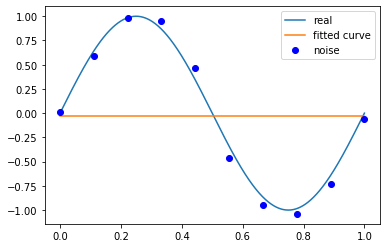

In [27]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.45485616  0.70296383]


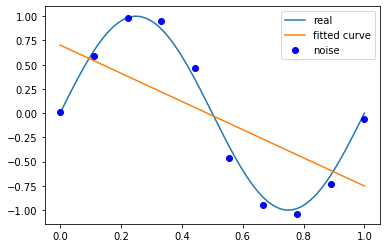

In [31]:
# M = 1
p_lsq_1 = fitting(M = 1)

Fitting Parameters: [-0.15930179 -1.29555441  0.67936358]


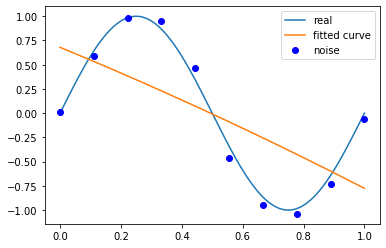

In [34]:
# M = 2
p_lsq_2 = fitting(M = 2) #此时二次项系数太小，看起来像一次函数

Fitting Parameters: [ 22.1117037  -33.32685733  11.28900784  -0.08499162]


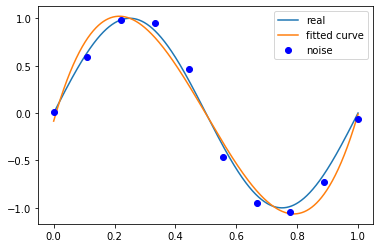

In [35]:
# M = 3
p_lsq_3 = fitting(M = 3)

Fitting Parameters: [-2.05507812e+04  9.23995630e+04 -1.73929598e+05  1.77807695e+05
 -1.07143010e+05  3.86776517e+04 -8.11279070e+03  8.83456687e+02
 -3.22627613e+01  1.46843502e-02]


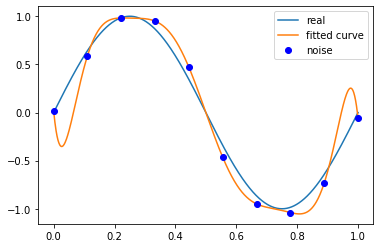

In [36]:
# M = 9,多项式次数过高，导致过拟合
p_lsq_9 = fitting(M=9)

### 正则化

当结果过拟合的时候，可以引入正则化项，降低过拟合，正则化的作用一般是尽量减小参数，使模型更加趋于简单

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [91]:
regularization = 0.0001

def residuals_func_regularization(p,x,y):
    ret = fit_func(p,x)-y 
    # 注意append与+的不同，append类似往列表里新增元素，而+是各个元素按对应位置相加
    ret = np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [92]:
# 最小二乘法，加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization,p_init,args=(x,y))[0]

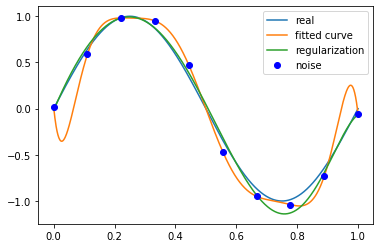

In [93]:
plt.plot(x_points,real_func(x_points),label='real')
plt.plot(x_points,fit_func(p_lsq_9,x_points),label='fitted curve')
plt.plot(x_points,fit_func(p_lsq_regularization,x_points),label="regularization")
plt.plot(x,y,'bo',label = 'noise')
plt.legend()